<a href="https://colab.research.google.com/github/asya99/AIHeadlines/blob/main/TextBlobAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk
!python -m textblob.download_corpora

nltk.download('punkt')
!pip install seaborn matplotlib

import matplotlib.pyplot as plt
from google.colab import files
file = files.upload()
data = pd.read_csv('mydata.csv')
data.head()


def extract_negative_words(text):
    analysis = TextBlob(text)
    negative_words = [word.lower() for word, polarity in analysis.tags if TextBlob(word).sentiment.polarity < 0]


    exclusion_list = ['artificial', "'killed", 'killed', 'small', "'small",'mental', 'tedious', 'mere', 'contrary', 'long', 'artificial intelligence', 'angry', 'common', 'robotic', 'replace', 'other', 'wide', 'alien','green',
                      'cold','girlfriend','inevitable','black','subject','complex','boring','active','everyday','tough','flat','cardiac','minor','paid','smart','past','secret','counterattack', 'game','hidden',"'hidden",'slow',
                      'plain','center','stereotypical','less','expected','firm','widely','closed','tight','single','cutting','tries','previous','tired','commonly','average','fearful','terrifying','allegedly','complaint',
                      'carefully','vacuum','approximately','heavy','dramatic','cozy','sec','mean','partial','broken','round','minimal','mundane','base','sermon','chicken','flawed','falsely','infamous','excuse','stupidly','average',
                      'remote','subtle','imitation','wan','sharp','seriously','foreign','due', 'single','brutal','failure','fails','failed','harder','hard','illegal','illegally','aged','curious','boundless','curious','center',"'center",'half',"'single",'stupidity',
                      'shocked','shocking','dazed']

    negative_words = [word for word in negative_words if word not in map(str.lower, exclusion_list)]

    return negative_words


# Apply sentiment analysis to headline data
data['negative_words'] = data['translated_title'].apply(extract_negative_words)

# Filter headlines with negative words
negative_headlines = data[data['negative_words'].apply(lambda x: len(x) > 0)]

# Print relevant headlines
for idx, row in negative_headlines.iterrows():
    print("Headline:", row['translated_title'])
    print("Negative Words:", row['negative_words'])
    print()

#Print total number of negative headlines
print("Number of negative headlines:", len(negative_headlines))
# Export to a new CSV file
negative_headlines.to_csv('negative_headlines.csv', index=False)




[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Saving mydata.csv to mydata (7).csv
Headline: Controlling AI: Be careful, AI! | ZEIT ONLINE - ZEIT ONLINE English
Negative Words: ['careful']

Headline: Know how AI is being leveraged to launch sophisticated attacks - The Siasat Daily
Negative Words: ['attack']

Headline: On Language: A solution for an unnecessary AI problem - Traverse City Record Eagle
Negative Words: ['unnecessary', 'problem']

Headline: How to stop AI taking your job and five careers that are doomed to ‘robot takeover,’ expert reveals... - The Sun
Negative Words: ['takeover']

Headline: Owner of Intercorp does not promote “investment platform with AI” in 2023: the video is false - La República Perú
Negative Words: ['false']

Headline: Opinion: AI-Generated Images of Naughty Monks Not Real Problem of Thai Buddhism - Khaosod English
Negative Words: ['naughty']

Headline: North Carolina child psychiatrist hit with 40 years for filming minors, using AI to make child porn: 'inconceivable' - New York Post
Negative Words: 

Saving negative_headlines.csv to negative_headlines (1).csv
risk: 107
warn: 66
threat: 54
down: 38
concern: 38
privacy: 37
problem: 32
behind: 28
attack: 25
issue: 25
fear: 25
fake: 22
bad: 22
dark: 21
kill: 20
dangerous: 16
military: 16
trick: 14
critic: 14
porn: 13
little: 12
destroy: 11
worse: 11
clone: 11
fail: 11
replace: 10
few: 9
late: 9
serious: 9
disinformation: 9
afraid: 8
dead: 8
waste: 8
illegal: 8
worst: 8
wrong: 8
careful: 7
takeover: 7
evil: 7
hard: 7
worry: 6
surveillance: 6
scary: 6
vulnerable: 6
manipulate: 6
false: 5
misinformation: 5
alleged: 5
complain: 4
propaganda: 4
shock: 4
losers: 4
lonely: 4
disturbing: 4
terror: 4
complicated: 3
loses: 3
missing: 3
liable: 3
secretly: 3
deadly: 3
unknown: 3
mess: 3
creepy: 3
stupid: 3
limited: 3
impossible: 3
weird: 2
victim: 2
hazardous: 2
flaw: 2
narrow: 2
endless: 2
excessive: 2
hate: 2
weak: 2
desperately: 2
negative: 2
fanatic: 2
difficult: 2
least: 2
destructive: 2
annoying: 2
wary: 2
unlikely: 2
unnecessary: 1
naughty

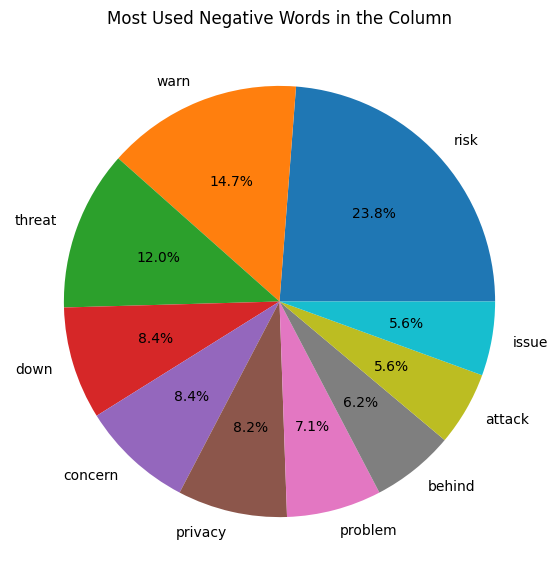

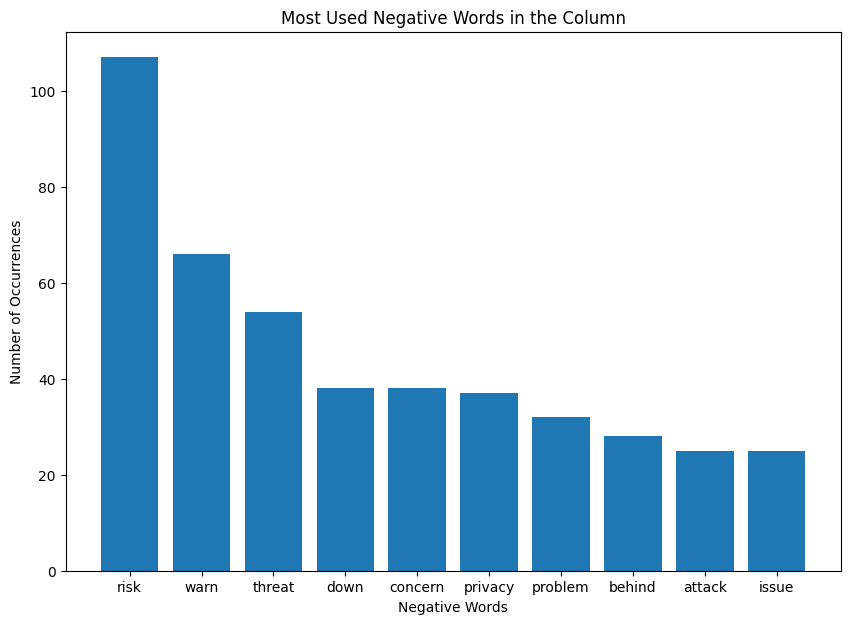

In [ ]:
from google.colab import files
import csv
from collections import Counter

# Define the CSV file path

csv_file_path = list(files.upload().keys())[0]

# Define the column name containing the words
column_name = 'negative_words'

# Initialize a Counter object to store word counts
word_counts = Counter()

# Read the CSV file and count the occurrences of each word in the specified column
with open(csv_file_path, 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Assuming 'negative_words' is the column name
        words = row[column_name].split()  # Split the content of the column into words
        word_counts.update(words)  # Update the word counts
# Sort the word counts in descending order
sorted_word_counts = word_counts.most_common()

# Display the sorted word counts
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

import matplotlib.pyplot as plt

# Sort the word counts in descending order
sorted_word_counts = word_counts.most_common(10)

# Extract the words and counts
words, counts = zip(*sorted_word_counts)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=words, autopct="%1.1f%%")
plt.title("Most Used Negative Words in the Column")
plt.show()

import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(words, counts)
plt.xlabel("Negative Words")
plt.ylabel("Number of Occurrences")
plt.title("Most Used Negative Words in the Column")
plt.show()

